In [1]:
getwd()

[1] "/hpc/hub_oudenaarden/agiladi/data/tuft_release/release_code"

In [2]:
setwd("..")

In [3]:
set.seed(1111)

library(metacell)
source("release_code/metacell_functions.r")
library("Seurat")
library(flowCore)
library(flowWorkspace)
library(RColorBrewer)
library(GEOquery)
library(scales)
library(Hmisc)

Loading required package: reshape2
Warning message:
“package ‘reshape2’ was built under R version 3.6.3”Loading required package: plyr
Loading required package: plotrix
Warning message in .getGeneric(f, where, package):
“input string 'unable to find an inherited method for function ‘spillover’ for signature.*(flowSet|ncdfFlowSet)' cannot be translated to UTF-8, is it valid in 'ANSI_X3.4-1968'?”Warning message in .getGeneric(f, where, package):
“input string 'unable to find an inherited method for function ‘spillover’ for signature.*(flowSet|ncdfFlowSet)' cannot be translated to UTF-8, is it valid in 'ANSI_X3.4-1968'?”Warning message in .getGeneric(f, where, package):
“input string 'unable to find an inherited method for function ‘spillover’ for signature.*(flowSet|ncdfFlowSet)' cannot be translated to UTF-8, is it valid in 'ANSI_X3.4-1968'?”Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The

In [4]:
dir.create("release_figures")

outdir = "release_figures/primary_material/"
dir.create(outdir)

Warning message in dir.create("release_figures"):
“'release_figures' already exists”Warning message in dir.create(outdir):
“'release_figures/primary_material' already exists”

## Read Elmentaite's dataset

setwd("release_umi.tab/")
system("wget https://cellgeni.cog.sanger.ac.uk/gutcellatlas/Full_obj_raw_counts_nosoupx_v2.h5ad")
setwd("..")

library(SeuratDisk)

Convert("release_umi.tab/Full_obj_raw_counts_nosoupx_v2.h5ad", dest="h5seurat", overwrite=T)
obj = LoadH5Seurat("release_umi.tab/Full_obj_raw_counts_nosoupx_v2.h5seurat")


In [5]:
load("release_umi.tab/Full_obj_raw_counts_nosoupx_v2.Rda")

obj = readRDS("published_data/Naturedataset.RDS")

In [6]:
X = obj@assays$RNA
metadata = obj@meta.data

dim(X)

Loading required package: SeuratObject
Warning message:
“package ‘SeuratObject’ was built under R version 3.6.3”Registered S3 methods overwritten by 'SeuratObject':
  method                     from  
  $.JackStrawData            Seurat
  $.Seurat                   Seurat
  $.SeuratCommand            Seurat
  $<-.Seurat                 Seurat
  [.Assay                    Seurat
  [.DimReduc                 Seurat
  [.Seurat                   Seurat
  [.SeuratCommand            Seurat
  [[.Assay                   Seurat
  [[.DimReduc                Seurat
  [[.Seurat                  Seurat
  levels<-.Seurat            Seurat
  .DollarNames.JackStrawData Seurat
  .DollarNames.Seurat        Seurat
  .DollarNames.SeuratCommand Seurat
  as.list.SeuratCommand      Seurat
  as.logical.JackStrawData   Seurat
  dim.Assay                  Seurat
  dim.DimReduc               Seurat
  dim.Seurat                 Seurat
  dimnames.Assay             Seurat
  dimnames.DimReduc          Seurat
  dimna

[1]  33538 428469

head(metadata)

In [7]:
write.table(table(metadata$Integrated_05))

"Var1" "Freq"
"1" "Activated CD4 T" 3948
"2" "Activated CD8 T" 5738
"3" "Activated T" 996
"4" "Adult Glia" 580
"5" "BEST2+ Goblet cell" 3025
"6" "BEST4+ epithelial" 4555
"7" "Branch A1 (iMN)" 1742
"8" "Branch A2 (IPAN/IN)" 699
"9" "Branch A3 (IPAN/IN)" 272
"10" "Branch A4 (IN)" 136
"11" "Branch B1 (eMN)" 1938
"12" "Branch B2 (eMN)" 512
"13" "Branch B3 (IPAN)" 59
"14" "CD8 Tmem" 1730
"15" "CLC+ Mast cell" 142
"16" "CLDN10+ cells" 260
"17" "CLP" 186
"18" "CX3CR1+ CD8 Tmem" 111
"19" "Colonocyte" 14133
"20" "Contractile pericyte (PLN+)" 2784
"21" "Cycling B cell" 2199
"22" "Cycling plasma cell" 1157
"23" "D cells (SST+)" 143
"24" "DZ GC cell" 851
"25" "Differentiating glia" 459
"26" "Distal progenitor" 3077
"27" "EC cells (NPW+)" 59
"28" "EC cells (TAC1+)" 422
"29" "EECs" 485
"30" "ENCC/glia Progenitor" 3257
"31" "Enterocyte" 37460
"32" "FCRL4+ Memory B" 308
"33" "FDC" 203
"34" "Fetal arterial EC" 2059
"35" "Fetal venous EC" 982
"36" "GC B cell" 1306
"37" "Germ" 14
"38" "Glia 1 (DHH+)" 100

In [8]:
eec_pops = c('EC cells (TAC1+)', 'EC cells (NPW+)', 'EECs', 'M/X cells (MLN/GHRL+)',
             'L cells (PYY+)', 'I cells (CCK+)', 'D cells (SST+)', 'K cells (GIP+)',
             'N cells (NTS+)', 'β cells (INS+)')

anno = as.vector(metadata$Integrated_05)
anno[ anno %in% eec_pops] = "EEC"
table(metadata$Integrated_05,anno)

                               anno
                                Activated CD4 T Activated CD8 T Activated T
  Activated CD4 T                          3948               0           0
  Activated CD8 T                             0            5738           0
  Activated T                                 0               0         996
  Adult Glia                                  0               0           0
  BEST2+ Goblet cell                          0               0           0
  BEST4+ epithelial                           0               0           0
  Branch A1 (iMN)                             0               0           0
  Branch A2 (IPAN/IN)                         0               0           0
  Branch A3 (IPAN/IN)                         0               0           0
  Branch A4 (IN)                              0               0           0
  Branch B1 (eMN)                             0               0           0
  Branch B2 (eMN)                             0     

In [9]:
good_pops = c("Stem cells", "TA", "Enterocyte", "Goblet cell", "Paneth", "EEC", "Tuft")
anno = factor(anno, levels = good_pops); names(anno) = rownames(metadata)
table(anno)

anno
 Stem cells          TA  Enterocyte Goblet cell      Paneth         EEC 
       8077       50024       37460        5330        3064        1909 
       Tuft 
        737 

In [10]:
good_cells = names(anno)[ anno %in% good_pops &
                        metadata$Age_group == "Adult"]
x = table(anno[ good_cells])
x
setdiff(good_pops, names(x))


 Stem cells          TA  Enterocyte Goblet cell      Paneth         EEC 
       1022       43485        9649         699        2655         112 
       Tuft 
        569 

character(0)

In [11]:
tuft_cells = intersect(good_cells, names(anno)[ anno == "Tuft"])
length(tuft_cells)

sort(table(as.vector(metadata[ tuft_cells, "Sample.name"])))

[1] 569


A33 (414C) A30 (398B) A38 (432C) A34 (417C) A32 (411C) A39 (440C) A26 (386C) 
         4         15         47         58         80        115        250 

In [12]:
k=500
samp_cells = unlist(tapply(good_cells, anno[good_cells], function(x) sample(x, min(length(x), k))))
table(anno[ samp_cells])
length(samp_cells)


 Stem cells          TA  Enterocyte Goblet cell      Paneth         EEC 
        500         500         500         500         500         112 
       Tuft 
        500 

[1] 3112

## MOVE TO PREPROCESSING

head(metadata)
dim(X)

good_cells = rownames(metadata)[metadata$Diagnosis == "Healthy adult" & metadata$Region == "SmallInt" & metadata$category == "Epithelial"]
length(good_cells)

id = "Elmentaite"
id_all = "Elmentaite_all"

scdb_add_mat(id_all, tgScMat(mat=X[, good_cells], cell_metadata=metadata[ good_cells,]))


bad_genes = unique(c(grep("^MT-|^ERCC|^IG[HLK]", rownames(X), v=T)))
bad_genes

import_metacell_structure(id = id, 
                        folder = "release_import/figure1_Elmentaite/", 
                        all_id = id_all, 
                        bad_genes = bad_genes, 
                        url = NULL)

In [13]:
id = "Elmentaite"
scdb_init("saved_work/", force_reinit = T)
sc_2d = scdb_mc2d(id); sc_cl = scdb_mc(id); sc_mat = scdb_mat(id)

cells = names(sc_cl@mc)
cell_stats = sc_mat@cell_metadata[cells,]
colnames(cell_stats) = gsub(" ", ".", colnames(cell_stats))
colnames(cell_stats) = gsub("\\(|\\)", "_", colnames(cell_stats))

initializing scdb to saved_work/


In [14]:
umicount = as.matrix(read.delim("release_import/figure1_Elmentaite/umicount.txt", stringsAsFactors = F, row.names = 1))[,1]
head(umicount)

AAACGGGCAGTCAGAG-1-Human_colon_16S8000511 
                                    39976 
AAAGCAATCCGTTGTC-1-Human_colon_16S8000511 
                                    18320 
AACACGTTCCTGCAGG-1-Human_colon_16S8000511 
                                     6295 
AACCATGGTCGGCATC-1-Human_colon_16S8000511 
                                    17850 
AACCGCGTCAACACCA-1-Human_colon_16S8000511 
                                    23801 
AACGTTGTCGGGAGTA-1-Human_colon_16S8000511 
                                     1070

In [15]:
#doublet = cell_stats$doublet_scores; names(doublet) = rownames(cell_stats)
good_cells = rownames(cell_stats)#names(which(doublet < 0.1))
length(good_cells)

[1] 15184

In [16]:
data = X[,good_cells]
data_n = sweep(data,2,colSums(data),"/") * 1000
table(anno[ good_cells])


 Stem cells          TA  Enterocyte Goblet cell      Paneth         EEC 
        346        2297        8996         166        2538          13 
       Tuft 
         74 

In [17]:
plot_feature_maps = function(i, genes, nr = 2, nc = 3, rfac = 5) {
#genes = c("KIT", "POU2F3", "IL4R", "IL27RA", "IL17RB"); i = 1; nr = 1; nc = 1; rfac = 5
    #all_cells = sample(good_cells)
    cb = 1 / nc
    rb = 1 / nr
    locs = cbind(rep(seq_len(nc) - 1, nr), rep(rev(seq_len(nr)) - 1, each = nc))
    gene = genes[i]
    umis = sc_mat@mat[gene, names(sc_cl@mc)]
    umis_n = umis / umicount[ names(umis)]
    all_cells = names(sort(umis_n))
    vals = umis_n[all_cells]
    pos_vals = log(1 + 1 * vals[ vals > 0])
    pos_vals = pmin(pos_vals, quantile(pos_vals, 0.99))
    val_n = rep(1, length(all_cells)); names(val_n) = all_cells
    val_n[ names(pos_vals)] = round(100 * pos_vals / max(pos_vals)) + 1
    grad = colorRampPalette(c("gray90", "gray90", brewer.pal(3, "Reds")))(101)
    #grad = colorRampPalette(c("gray80","gray80", "blue3"))(101)
    cell_ord = names(val_n) #sort(val_n))
    r = locs[i,2]; c = locs[i,1]
    par(fig = c(c / nc, c / nc + cb * 0.85, r / nr, r / nr + rb * 0.85), mar = rep(0.5,4), new = (i > 1))
    #plot(df[,"x"], df[,"y"], pch = 20, col = grad[1],
    #    axes = F, xlab = "", ylab = "", cex = 0.7, main = gene)
    df = cbind(x = sc_2d@sc_x[ all_cells], y = sc_2d@sc_y[ all_cells], col = grad[ val_n[ all_cells]], 
               rx = round(sc_2d@sc_x[ all_cells] / rfac), ry = round(sc_2d@sc_y[ all_cells] / rfac))
    df = df[ !duplicated(df[, c("col", "rx", "ry")]),]
    dim(df)
    plot(df[,"x"], df[,"y"], pch = 20, cex = 0.7, col = df[,"col"], axes = F, xlab = "", ylab = "", main = gene)
    par (fig = c(c / nc + cb * 0.9, c / nc + cb * 1, r / nr + rb * 0.3, r / nr + rb * 0.6), new=T)
    ax = seq(0, max(pos_vals), length.out = length(grad))
    image(y = ax, t(seq_along(grad)), axes = F, col = grad)
    box(); axis(2, at = quantile(ax, c(0,1)), labels = round(quantile(ax, c(0,1)),3), las = 2)
}


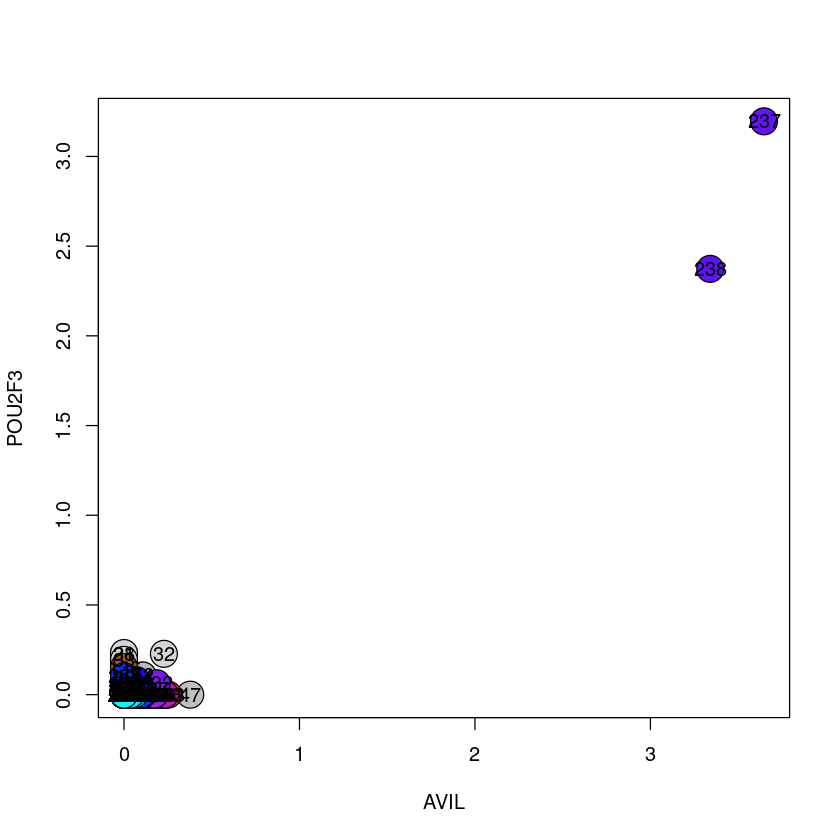

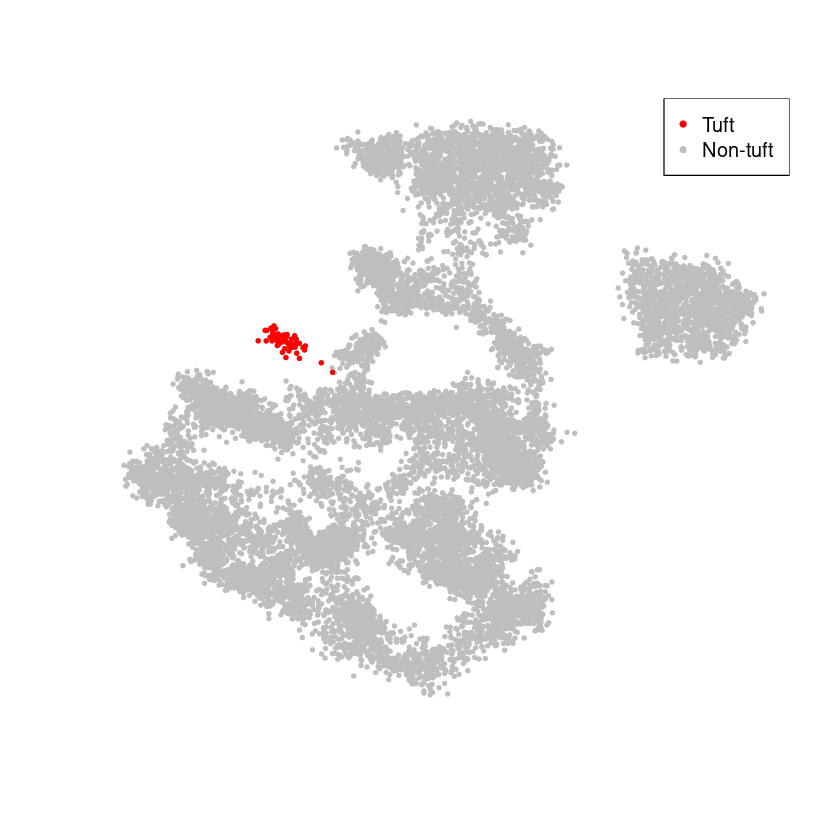

In [18]:
X = plot_two_genes_fp(id, "AVIL", "POU2F3")
tuft_mc = rownames(X)[ X[,1] > 1]
tuft_mc_cells = names(sc_cl@mc)[ sc_cl@mc %in% tuft_mc]

# Identify tuft cells
plot(sc_2d@sc_x, sc_2d@sc_y, pch = 20, col = "gray",axes = F, xlab = "", ylab = "", cex = 0.7)
points(sc_2d@sc_x[ tuft_mc_cells], sc_2d@sc_y[ tuft_mc_cells], pch = 20, col = "red", cex = 0.7)
legend("topright", c("Tuft", "Non-tuft"), pch = 20, col = c("red", "gray"))

png 
  2

png 
  2

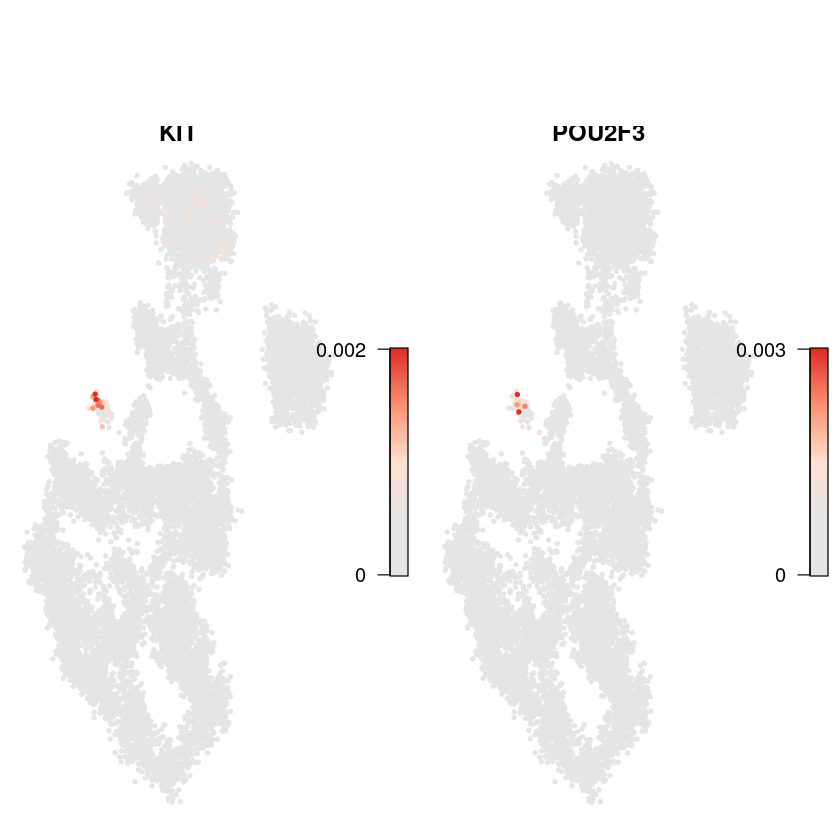

In [19]:
genes = c("KIT", "POU2F3")
pdf(paste0(outdir, "/FigS2g.pdf"), height=5, width=10, useDingbats=F)
plot_feature_maps(1, "KIT", rfac = 1, nr=1, nc = 1)
dev.off()

pdf(paste0(outdir, "/FigS5a_right.pdf"), height=5, width=10, useDingbats=F)
plot_feature_maps(1, "KIT", rfac = 1, nr=1, nc = 1)
dev.off()

invisible(sapply(seq_along(genes), plot_feature_maps, genes, rfac = 1, nr=1, nc = 2))

png 
  2

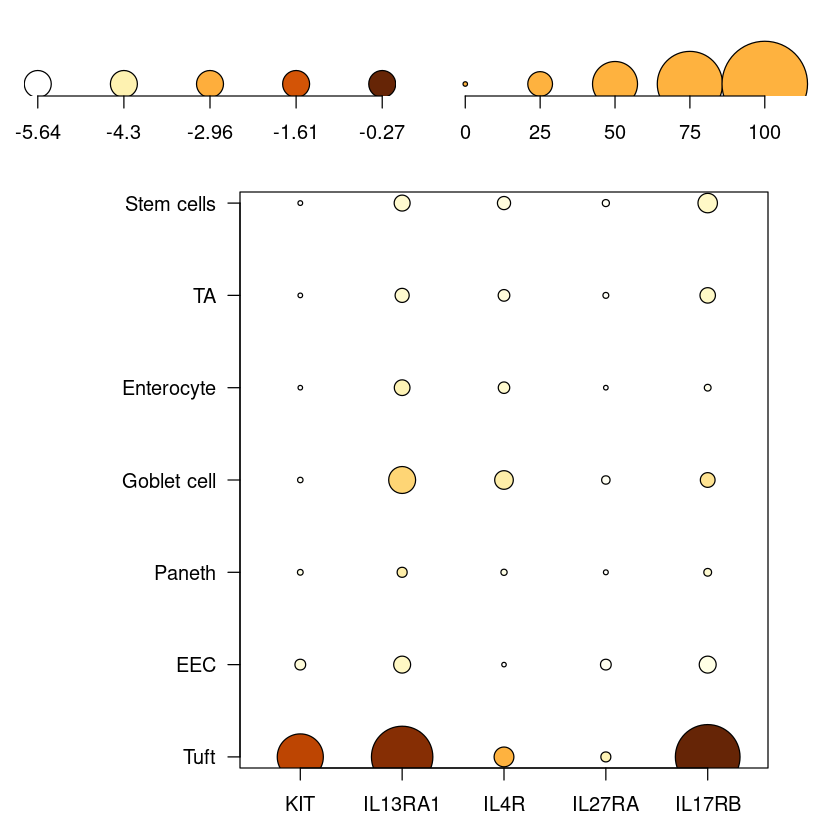

png 
  2

Warning message in file(file, "rt"):
“cannot open file 'annotations//stem_genes.txt': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


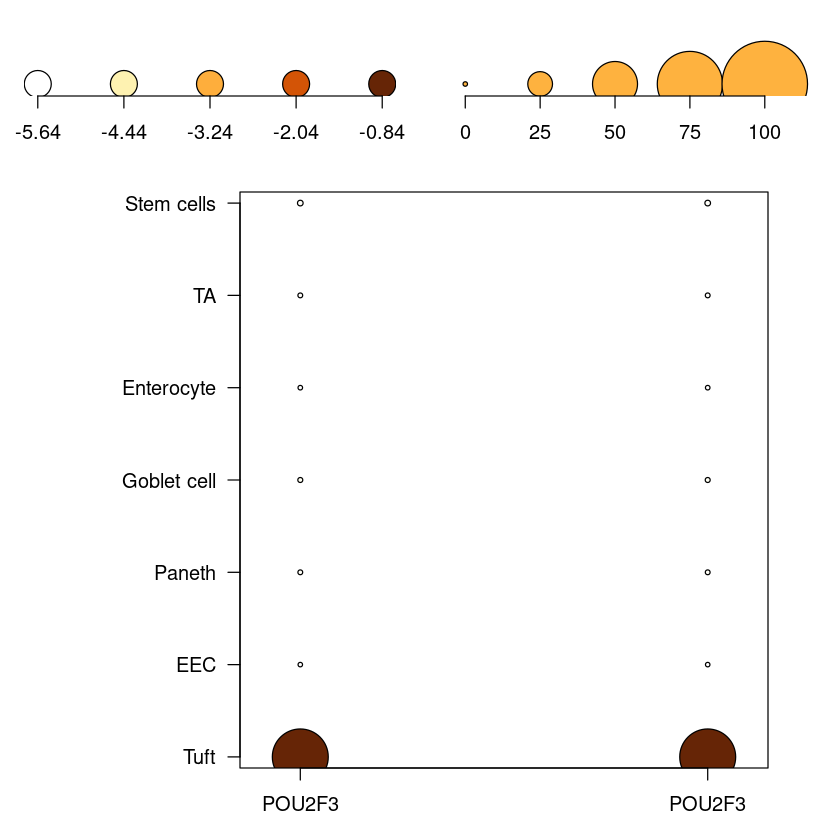

In [20]:
genes = c("KIT", "IL13RA1", "IL4R", "IL27RA", "IL17RB")
m = t(apply(data_n[genes, good_cells], 1, tapply, anno[ good_cells], mean))
IM = log2(m[, rev(colnames(m))] + 0.02)
exp_freq = t(apply(data[genes, good_cells] > 0, 1, tapply, anno[ good_cells], mean)) * 100
exp_freq = exp_freq[ ,colnames(IM)]

grad = colorRampPalette(c("white", brewer.pal(9, "YlOrBr")))(101)

p = function() {
    par(mar = c(3,10,1,3))
    matplot.2(t(IM), t(exp_freq), grad=grad, cex_lim = seq(0,100, by = 25))
}

p()
pdf(paste0(outdir, "/Fig2a.pdf"), height=10, width=15, useDingbats = F)
p()
dev.off()

genes = c("POU2F3", "POU2F3")
m = t(apply(data_n[genes, good_cells], 1, tapply, anno[ good_cells], mean))
IM = log2(m[, rev(colnames(m))] + 0.02)
exp_freq = t(apply(data[genes, good_cells] > 0, 1, tapply, anno[ good_cells], mean)) * 100
exp_freq = exp_freq[ ,colnames(IM)]

grad = colorRampPalette(c("white", brewer.pal(9, "YlOrBr")))(101)

p = function() {
    par(mar = c(3,10,1,3))
    matplot.2(t(IM), t(exp_freq), grad=grad, cex_lim = seq(0,100, by = 25))
}

p()
pdf(paste0(outdir, "/FigS5a_left.pdf"), height=10, width=15, useDingbats = F)
p()
dev.off()

genes = union(read.table("annotations//stem_genes.txt", stringsAsFactors = F)[[1]],
              c("MEX3A", "ANXA1", "TACSTD2", "PROX1"))

m = t(apply(data_n[genes, good_cells], 1, tapply, anno[ good_cells], mean))
IM = log2(m + 0.02)
exp_freq = t(apply(data[genes, ] > 0, 1, tapply, anno[ colnames(data_n)], mean)) * 100
exp_freq = exp_freq[ ,colnames(m)]

p()
pdf(paste0(outdir, "/FigS8b.pdf"), height=10, width=15, useDingbats = F)
p()
dev.off()


png 
  2

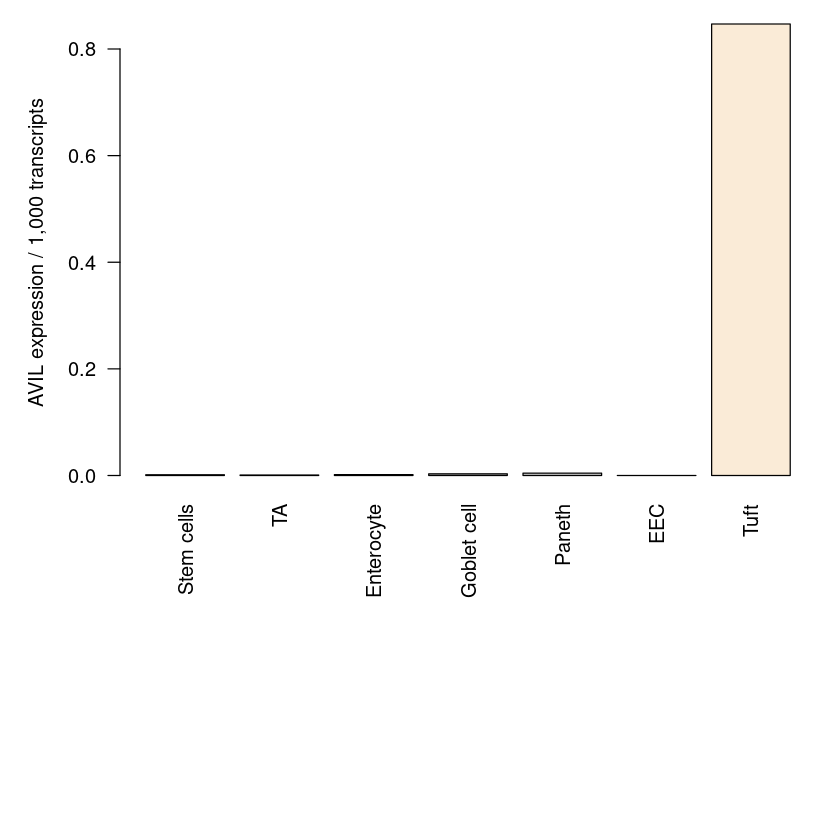

In [22]:
gene = "AVIL"
m = tapply(data_n[gene, good_cells], anno[ good_cells], mean)

p = function() {
    par(mar = c(15,5,1,1))
    barplot(m,las=2, ylab = "AVIL expression / 1,000 transcripts", col = ifelse(names(m) == "Tuft", "antiquewhite", "gray80"))    
}

p()
pdf(paste0(outdir, "/Fig1a.pdf"), useDingbats = F)
p()
dev.off()

In [23]:
l = names(table(anno[ good_cells]))
l

[1] "Stem cells"  "TA"          "Enterocyte"  "Goblet cell" "Paneth"     
[6] "EEC"         "Tuft"

In [24]:
#apply(Z, 2, function(x) names(head(sort(x,T),10)))
genes = c("LGR5", "OLFM4", "APOA1", "APOB", "ALDOB", "ZG16", "MUC2", "FCGBP",
         "DEFA6", "DEFA5", "REG3A", "CHGB", "CHGA", "LCN15", "AVIL", "KIT", "POU2F3")
gene_anno = c(rep("Stem cells", 2), rep(l[-(1:2)], each = 3)); 
gene_anno = factor(gene_anno, levels = unique(gene_anno));
names(gene_anno) = genes
gene_anno

LGR5       OLFM4       APOA1        APOB       ALDOB        ZG16 
 Stem cells  Stem cells  Enterocyte  Enterocyte  Enterocyte Goblet cell 
       MUC2       FCGBP       DEFA6       DEFA5       REG3A        CHGB 
Goblet cell Goblet cell      Paneth      Paneth      Paneth         EEC 
       CHGA       LCN15        AVIL         KIT      POU2F3 
        EEC         EEC        Tuft        Tuft        Tuft 
Levels: Stem cells Enterocyte Goblet cell Paneth EEC Tuft

zlim: -0.957716931907821<>0.957716931907821
zlim: -0.957716931907821<>0.957716931907821


png 
  2

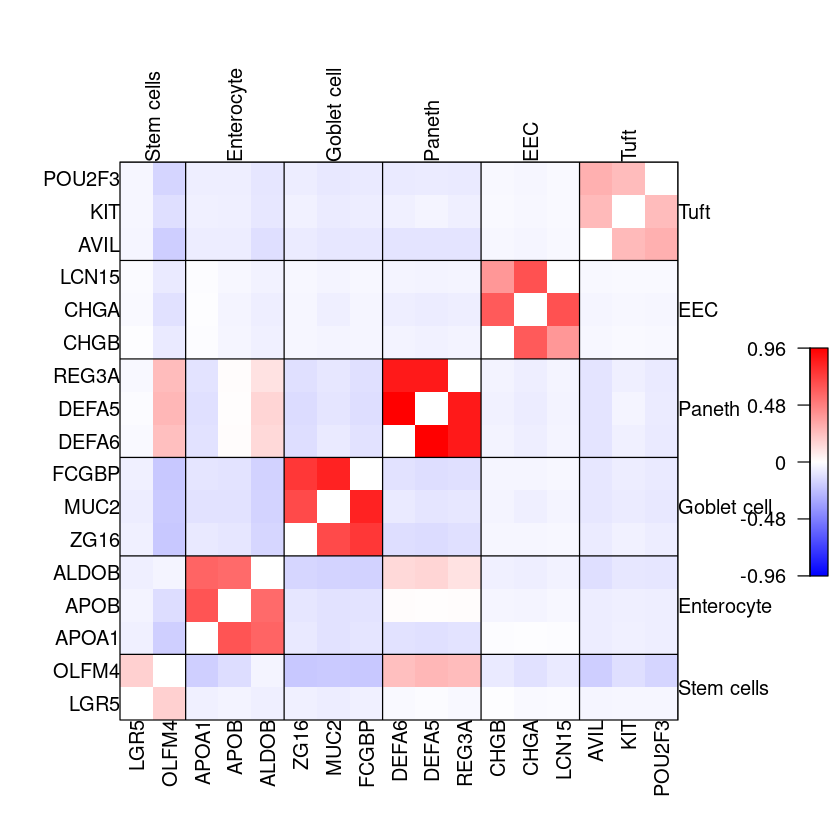

In [25]:
ds = .downsamp(obj@assays$RNA[, samp_cells], 1000)
grad = colorRampPalette(c("blue", "white", "red"))(1000)

p = function() {
    par(fig=c(0,0.95,0,0.95), mar = c(5,5,5,5))
    C = cor(t(log(1 + ds[genes,]))); diag(C) = NA
    image.2(C, b=T, hct = gene_anno, vct = gene_anno); box()
    par(fig=c(0.95,1,0.3,0.6), new=T, mar = rep(0.5,4))
    zlim = max(abs(C), na.rm = T)
    ax = seq(-zlim, zlim, length.out = length(grad))
    image(y = ax, t(seq_along(grad)), axes = F, col = grad)
    box(); axis(2, at = quantile(ax), labels = round(quantile(ax),2), las = 2)

}

p()
pdf(paste0(outdir, "/Fig3m.pdf"), useDingbats = F)
p()
dev.off()

## Analyze Hickey's paper

In [26]:
id = "hickey_tuft"
sc_mat = scdb_mat(id)
sc_mat@ncells

[1] 690

In [27]:
cell_stats = sc_mat@cell_metadata[ sc_mat@cells,]
head(cell_stats)

write.table(colnames(cell_stats))

,UMAP_1,UMAP_2,CellType,tissue,folder,amp_batch_id
B001-A-001_AAAGGGCAGCTGGCCT-1,-7.64656,5.766565,Tuft,Jejunum,B001-A-001,1
B001-A-001_AGGAATACAAAGCTAA-1,-7.05902,2.737837,Tuft,Jejunum,B001-A-001,1
B001-A-001_AGGTCATGTGACAGCA-1,-7.54471,5.725921,Tuft,Jejunum,B001-A-001,1
B001-A-001_CAAGGGAGTAGACGGT-1,2.29753,-3.137839,Tuft,Jejunum,B001-A-001,1
B001-A-001_CAGGTATGTTACGGAG-1,-7.79100,5.698730,Tuft,Jejunum,B001-A-001,1
B001-A-001_CCACCATAGGATAATC-1,-7.60717,5.562339,Tuft,Jejunum,B001-A-001,1


"x"
"1" "UMAP_1"
"2" "UMAP_2"
"3" "CellType"
"4" "tissue"
"5" "folder"
"6" "amp_batch_id"


In [29]:
cell_stats$patient = vecsplit(cell_stats$folder, "-", 1)
table(cell_stats$patient)


B001 B004 B005 B006 B008 B009 B010 B011 B012 
  53  160   76   59  151   57   36   21   77 

In [31]:
hickey_tuft_cells = rownames(cell_stats)[cell_stats$CellType == "Tuft" & cell_stats$tissue == "Jejunum"]
length(hickey_tuft_cells)

[1] 690

In [32]:
hickey_umis = read_large_umis(id, cells = hickey_tuft_cells)
hickey_n = sweep(hickey_umis, 2, colSums(hickey_umis), "/") * 1000
foc = log(1 + 7 * hickey_n)

dim(foc)

[1] 49632   690

In [33]:
dim(data)
table(anno)
sum(anno == "Tuft")
head(anno)

[1] 33538 15184

anno
 Stem cells          TA  Enterocyte Goblet cell      Paneth         EEC 
       8077       50024       37460        5330        3064        1909 
       Tuft 
        737 

[1] NA

AAACCTGAGAACAACT-1-4918STDY7333456 AAACCTGAGCGATATA-1-4918STDY7333456 
                              <NA>                               <NA> 
AAACCTGAGGAGTTTA-1-4918STDY7333456 AAACCTGAGTATCTCG-1-4918STDY7333456 
                              <NA>                               <NA> 
AAACCTGAGTGACTCT-1-4918STDY7333456 AAACCTGAGTGGACGT-1-4918STDY7333456 
                              <NA>                               <NA> 
Levels: Stem cells TA Enterocyte Goblet cell Paneth EEC Tuft

In [34]:
tuft_cells = names(anno)[ !is.na(anno) & anno == "Tuft" & metadata$Age_group == "Adult"]
length(tuft_cells)
tuft_umis = obj@assays$RNA[, tuft_cells]

shared_genes = intersect(rownames(tuft_umis), rownames(hickey_umis))
length(shared_genes)

shared_umis = cbind(tuft_umis[ shared_genes, ], hickey_umis[ shared_genes,])

[1] 569

[1] 33514

In [35]:
comb = ifelse(colnames(shared_umis) %in% hickey_tuft_cells, "Hickey", "Teichman"); names(comb) = colnames(shared_umis)
med_uc = tapply(colSums(shared_umis), comb, median)
med_uc

Hickey Teichman 
  3102.5   1821.0

In [36]:
shared_n = sweep(shared_umis, 2, colSums(shared_umis), "/") * 1000
shared_foc = log(1 + 7 * shared_n)

In [39]:
tuft_genes = read.delim("release_figures/fig3_organoids/activation_genes_sc_heatmap.txt", stringsAsFactors = F, row.names=1)

shared_top_genes = setdiff(intersect(rownames(shared_umis), rownames(tuft_genes)), c())
modules = t(apply(shared_foc[ shared_top_genes,], 2, tapply, tuft_genes[ shared_top_genes, "anno"], sum))
head(modules)
tail(modules)

,Core,Tuft-1,Tuft-2,Tuft-3,Tuft-4
AACCGCGTCAACACCA-1-Human_colon_16S8000511,43.22215,10.621095,6.606278,26.167758,12.013024
CAACCTCTCCTCGCAT-1-Human_colon_16S8000511,88.73431,0.000000,4.738485,11.012197,3.158990
CCACCTATCTATCCCG-1-Human_colon_16S8000511,47.90703,7.297684,8.245687,17.824660,13.135059
GAAACTCTCAGAGGTG-1-Human_colon_16S8000511,119.83721,5.237005,1.745668,3.491337,8.728342
GGCTCGACATCCGCGA-1-Human_colon_16S8000511,83.68258,5.393013,11.951395,4.372255,14.137522
TCCCGATAGATCTGAA-1-Human_colon_16S8000511,53.35647,7.827091,9.923300,18.641213,15.190416


,Core,Tuft-1,Tuft-2,Tuft-3,Tuft-4
B012-A-405_TGGTGCATCCCTCGCA-1,127.83117,15.439521,13.08968,21.164134,13.20146
B012-A-405_TGTCAGTAGGTCGAGG-1,151.36818,11.128611,11.69881,12.683185,16.36000
B012-A-405_TTGCAATCAGCTTACA-1,90.41156,13.295452,10.13728,10.044708,19.76625
B012-A-405_TTGTCCCAGCAAGGTA-1,116.76124,7.353475,12.30640,46.046560,17.40696
B012-A-405_TTGTGCGAGGCTGGCT-1,143.80638,9.721167,14.71482,9.611130,12.91390
B012-A-405_TTTGGTGCAGGTTCAC-1,158.51145,8.389490,14.22143,9.835671,18.75871


In [40]:
dim(modules)
head(metadata)
teichman_pat = as.vector(metadata[ tuft_cells, "Sample.name"]); names(teichman_pat) = tuft_cells
table(teichman_pat)

hickey_pat = as.vector(cell_stats[ colnames(hickey_umis), "patient"]); names(hickey_pat) = colnames(hickey_umis)
table(hickey_pat)

[1] 1259    5

,Sample.name,Diagnosis,Age,sample.name,Region.code,Fraction,Gender,Region,X10X,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_scores,predicted_doublets,category,Age_group,Integrated_05
AAACCTGAGAACAACT-1-4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,TIL,SC-EPCAMP,M,SmallInt,3',4918STDY7333456,968,968,1912.794,46.2281990,2.416789770,0.01644245,FALSE,B cells,Pediatric,DZ GC cell
AAACCTGAGCGATATA-1-4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,TIL,SC-EPCAMP,M,SmallInt,3',4918STDY7333456,693,693,2152.089,0.1225792,0.005695824,0.02738892,FALSE,B cells,Pediatric,Cycling B cell
AAACCTGAGGAGTTTA-1-4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,TIL,SC-EPCAMP,M,SmallInt,3',4918STDY7333456,720,720,1686.883,80.1958160,4.754081726,0.01481749,FALSE,T cells,Pediatric,gdT
AAACCTGAGTATCTCG-1-4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,TIL,SC-EPCAMP,M,SmallInt,3',4918STDY7333456,746,746,2135.184,104.5067596,4.894508839,0.03941606,FALSE,B cells,Pediatric,Memory B
AAACCTGAGTGACTCT-1-4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,TIL,SC-EPCAMP,M,SmallInt,3',4918STDY7333456,1227,1227,3103.050,95.8460770,3.088769674,0.02576251,FALSE,B cells,Pediatric,DZ GC cell
AAACCTGAGTGGACGT-1-4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,TIL,SC-EPCAMP,M,SmallInt,3',4918STDY7333456,1175,1175,3395.564,51.4235382,1.514432907,0.02576251,FALSE,T cells,Pediatric,Treg


teichman_pat
A26 (386C) A30 (398B) A32 (411C) A33 (414C) A34 (417C) A38 (432C) A39 (440C) 
       250         15         80          4         58         47        115 

hickey_pat
B001 B004 B005 B006 B008 B009 B010 B011 B012 
  53  160   76   59  151   57   36   21   77 

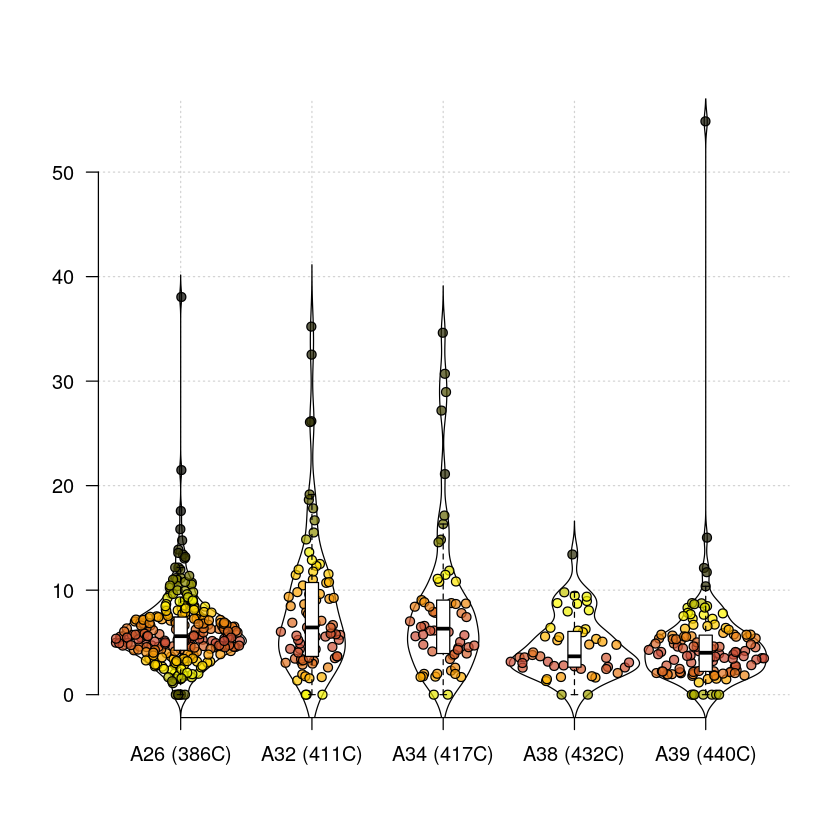

In [41]:
good_te_pats = names(which(table(teichman_pat) > 20))
good_te_cells = names(teichman_pat)[ teichman_pat %in% good_te_pats]
plot_density_points( modules[ good_te_cells, "Tuft-3"], teichman_pat[good_te_cells], with_box = T)
#plot_density_points( modules[ good_te_cells, "Tuft-4"], teichman_pat[good_te_cells], with_box = T)

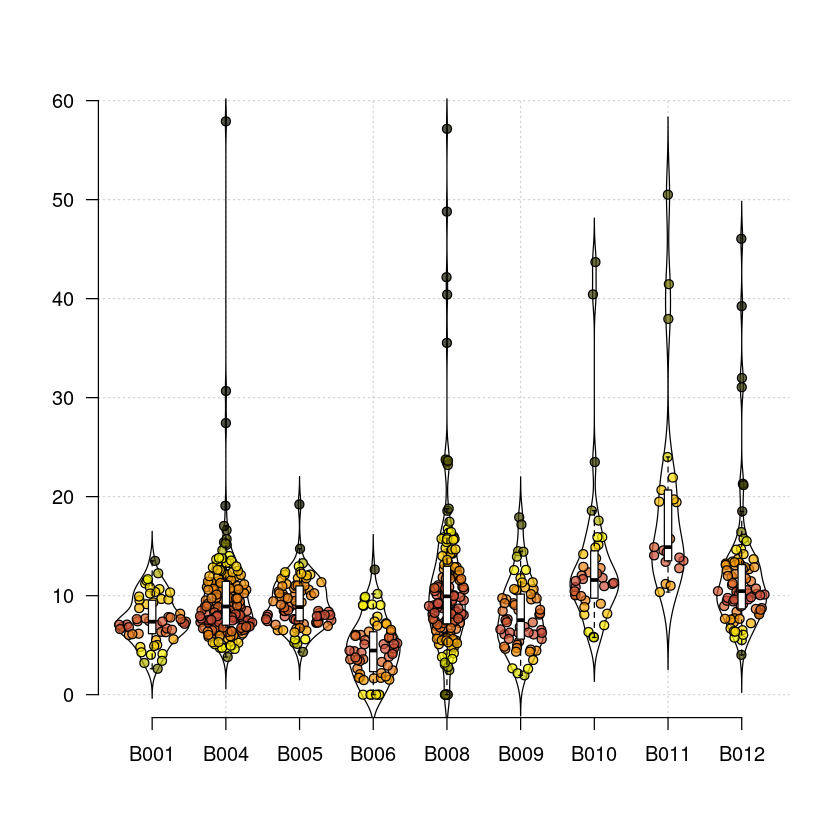

In [42]:
good_hi_pats = names(which(table(hickey_pat) > 20))
good_hi_cells = names(hickey_pat)[ hickey_pat %in% good_hi_pats]
plot_density_points( modules[ good_hi_cells, "Tuft-3"], hickey_pat[good_hi_cells], with_box = T)
#plot_density_points( modules[ good_hi_cells, "Tuft-4"], hickey_pat[good_hi_cells], with_box = T)

tecihman_sh = shuffle_umis_matrix(tuft_umis[ shared_genes,])
hickey_sh = shuffle_umis_matrix(hickey_umis[ shared_genes,])

shared_sh = cbind(tecihman_sh, hickey_sh)
shared_sh_n = sweep(shared_sh, 2, colSums(shared_sh), "/") * 1000
shared_sh_foc = log(1 + 7 * shared_sh_n)
sh_modules = t(apply(shared_sh_foc[ shared_top_genes,], 2, tapply, top_genes[ shared_top_genes, "anno"], sum))

In [44]:
cc_genes = read.table("release_figures/primary_material/cc_genes.txt", stringsAsFactors = F, h=T)[[1]]
cc_genes

[1] "CDCA8"     "CDC20"     "KIF2C"     "DEPDC1"    "IQGAP3"    "NUF2"     
 [7] "ASPM"      "KIF14"     "UBE2T"     "CENPF"     "CENPA"     "BUB1"     
[13] "CKAP2L"    "HJURP"     "TACC3"     "NCAPG"     "CENPE"     "MAD2L1"   
[19] "CCNA2"     "HMGB2"     "CCNB1"     "CDC25C"    "PTTG1"     "HMMR"     
[25] "KIFC1"     "TTK"       "CENPW"     "ANLN"      "EZH2"      "CDCA2"    
[31] "PBK"       "MCM4"      "CKS2"      "ZWINT"     "CDK1"      "KIF20B"   
[37] "KIF11"     "CEP55"     "MKI67"     "KIF18A"    "TROAP"     "CIT"      
[43] "DIAPH3"    "CDKN3"     "DLGAP5"    "ARHGAP11A" "BUB1B"     "KNL1"     
[49] "NUSAP1"    "CCNB2"     "KIF23"     "PRC1"      "AURKB"     "TOP2A"    
[55] "KIF18B"    "BIRC5"     "TYMS"      "NDC80"     "UBE2S"     "PCNA"     
[61] "TPX2"      "UBE2C"     "AURKA"     "C21orf58"  "CDC45"     "GTSE1"    
[67] "KIF4A"

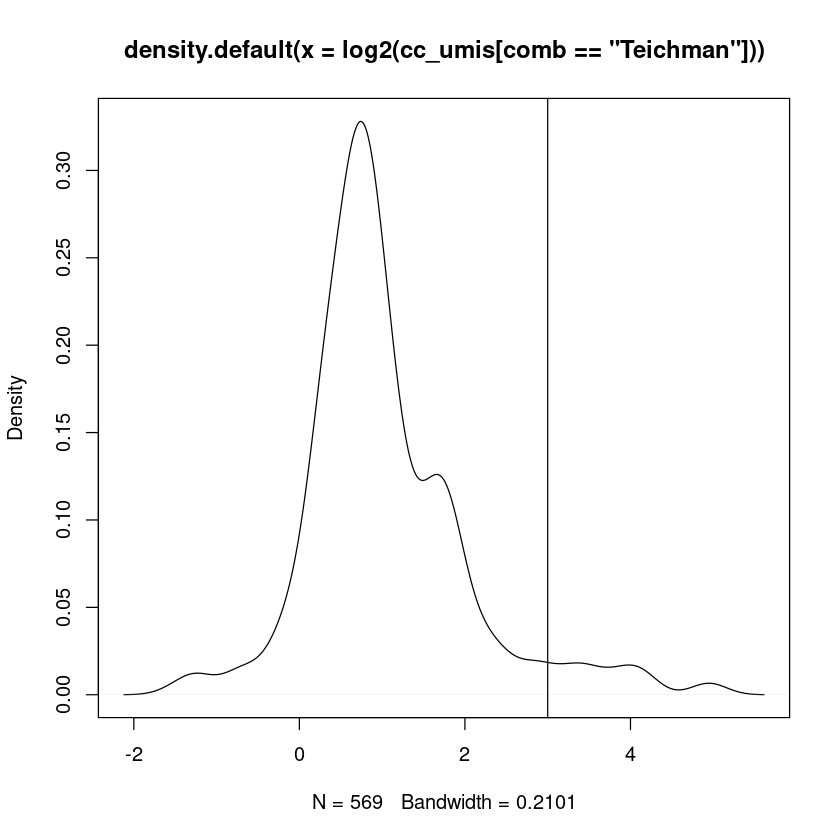

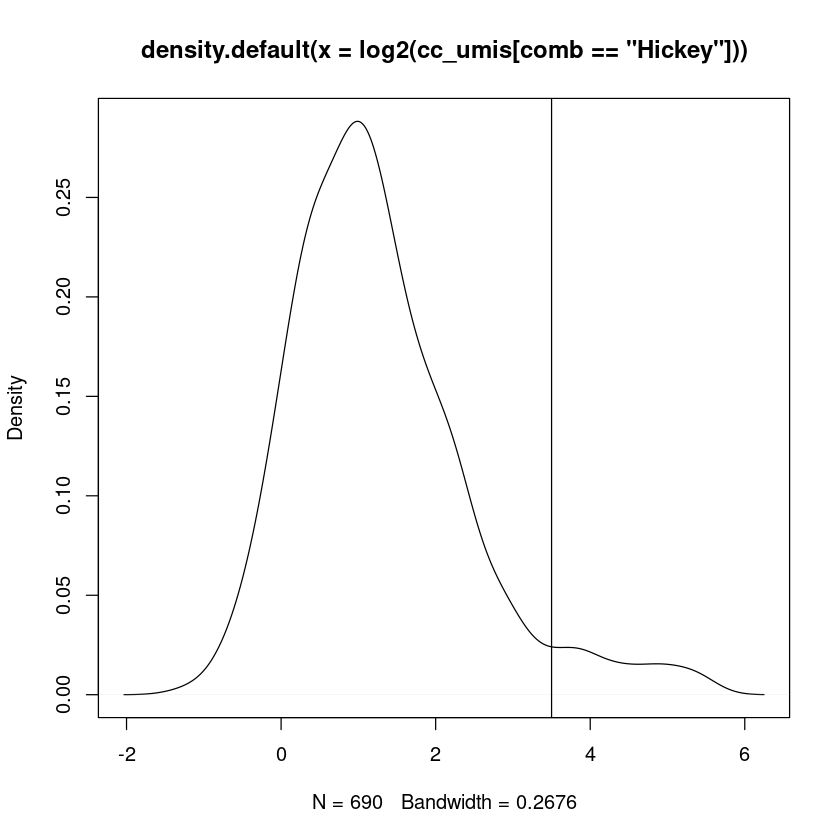

In [45]:
cc_umis = colSums(shared_foc[ cc_genes,])
plot(density(log2(cc_umis[ comb == "Teichman"]))); abline(v = 3)
plot(density(log2(cc_umis[ comb == "Hickey"]))); abline(v = 3.5)

png 
  2

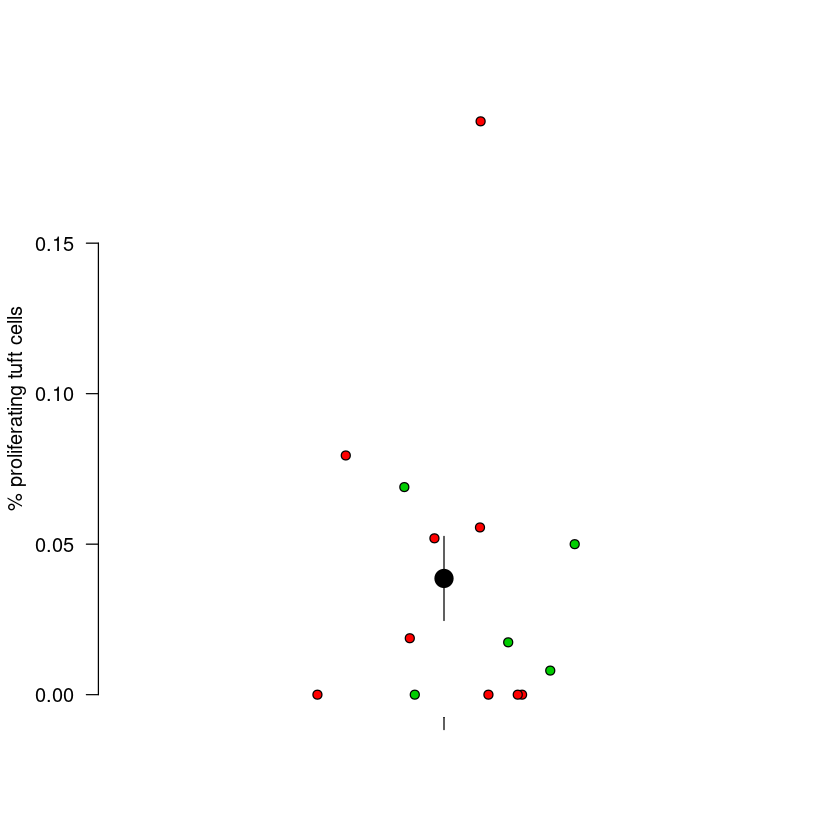

In [46]:
X = rbind(table(teichman_pat[ good_te_cells], log2(cc_umis[ good_te_cells]) > 3),
table(hickey_pat[ good_hi_cells], log2(cc_umis[ good_hi_cells]) > 3.5))
cc_freq = (X / rowSums(X))[,2]

cc_mean = mean(cc_freq)
cc_err = std.error(cc_freq)

p = function() {
    plot(runif(length(cc_freq), -0.2, 0.2), cc_freq, pch = 21, bg = 2 + (names(cc_freq) %in% good_te_pats), xlim = c(-0.5,0.5), axes = F,
        xlab = "", ylab = "% proliferating tuft cells", xaxs = "i")
    segments(0, cc_mean - cc_err, y1 = cc_mean + cc_err)
    points(0, cc_mean, pch = 20, cex = 3)
    axis(2, las = 2); axis(1, at = 0, labels = "")

}

p()
pdf(paste0(outdir, "/FigS4i.pdf"), height=6, width=2, useDingbats = F)
p()
dev.off()


## Analyze Regev's paper

In [47]:
scdb_init("saved_work/", force_reinit = T)
id = "regev_10x"
sc_mat = scdb_mat(id)
sc_mat@ncells

initializing scdb to saved_work/


ERROR: Error in eval(expr, envir, enclos): trying to get slot "ncells" from an object of a basic class ("NULL") with no slots


In [ ]:
cell_stats = sc_mat@cell_metadata[ sc_mat@cells,]
head(cell_stats)

write.table(colnames(cell_stats))

In [ ]:
summarize.table(table(cell_stats$Cluster, cell_stats$Health))

In [ ]:
gene = "KIT"
umis = as.matrix(sc_mat@mat[gene,])
table(cell_stats$Cluster, umis)

#patient = paste0(cell_stats$Subject, "@", ifelse(cell_stats$Health == "Healthy", "Healthy", "IBD")); names(patient) = rownames(cell_stats)
patient = paste0(cell_stats$Subject, "@", cell_stats$Health); names(patient) = rownames(cell_stats)
table(patient)

X = table(patient, cell_stats$Cluster == "Tuft")
tuft_freq = (X / rowSums(X))[,2]
tuft_freq

table(pat2health)
pat2health = vecsplit(names(tuft_freq), "@", 2)

boxplot(tuft_freq * 100 ~ pat2health)

wilcox.test(tuft_freq[ pat2health == "Healthy"], tuft_freq[ pat2health == "IBD"])

table(cell_stats$Cluster)

In [ ]:
#eec_pops = names(table(metadata$annotation))[12:21]
anno = paste0(cell_stats$Cluster, "@", cell_stats$Health)
#anno[ anno %in% eec_pops] = "EEC"
names(anno) = rownames(cell_stats)
table(anno)

In [ ]:
k=100
good_cells = names(anno)
samp_cells = unlist(tapply(good_cells, anno[good_cells], function(x) sample(x, min(length(x), k))))
table(anno[ samp_cells])
length(samp_cells)

In [ ]:
umis = read_large_umis(id ,cells = samp_cells)
umis_n = sweep(umis,2,colSums(umis),"/") * 1000

new_id = "regev_sampled"
mcell_mat_ignore_cells(new_mat_id=new_id, mat_id=id, samp_cells, reverse=T)

In [ ]:
grad = colorRampPalette(c("white", brewer.pal(9, "YlOrBr")))(101)
group_by = list(cell_stats[ colnames(umis), "Cluster"], 
            factor(cell_stats[ colnames(umis), "Health"], levels = c("Healthy", "Non-inflamed", "Inflamed")))
gene = "KIT"
m = tapply(umis_n[gene,], group_by, mean)
exp_freq = tapply(umis_n[gene,] > 0, group_by, mean) * 100

p = function() {
    par(mar = c(5,15,1,1))
    matplot.2(m, exp_freq, grad=grad, cex_lim = seq(0,100, by = 25))
}

p()
pdf(paste0(outdir, "/FigS2j.pdf"), height=7, width = 10, useDingbats = F)
p()
dev.off()

## Primary sort-seq data


In [49]:
scdb_init("saved_work", force=T)

sc_mat = scdb_mat("tuft_all")
sc_mat@ncells

cell_stats = sc_mat@cell_metadata
head(cell_stats)

initializing scdb to saved_work


[1] 2299

,amp_batch_id,cell_barcode,umicount,mt_count,coord,source,type,gating,treatment,age,clover
HUB.JO.s037_AAACAGGC,HUB.JO.s037,AAACAGGC,7296,1280,H18,Ileum,organoid,AVIL-Clover+,no_cyto,adult,AVIL
HUB.JO.s037_AAAGCGGA,HUB.JO.s037,AAAGCGGA,3461,626,P12,Ileum,organoid,AVIL-Clover+,IL4+IL13,adult,AVIL
HUB.JO.s037_AAAGGCTG,HUB.JO.s037,AAAGGCTG,4062,1019,O10,Ileum,organoid,AVIL-Clover+,IL4+IL13,adult,AVIL
HUB.JO.s037_AACACGCA,HUB.JO.s037,AACACGCA,8352,1471,L20,Ileum,organoid,AVIL-Clover+,IL4+IL13,adult,AVIL
HUB.JO.s037_AACATGGG,HUB.JO.s037,AACATGGG,4986,692,P10,Ileum,organoid,AVIL-Clover+,IL4+IL13,adult,AVIL
HUB.JO.s037_AACCCAAC,HUB.JO.s037,AACCCAAC,8453,1449,O15,Ileum,organoid,AVIL-Clover+,IL4+IL13,adult,AVIL


In [50]:
bad_genes = grep("^MT-|^IG[H,L]|^ERCC", sc_mat@genes, v=T)
good_genes = setdiff(sc_mat@genes, bad_genes)

In [51]:
with(cell_stats[ cell_stats$type == "tissue",], table(paste0(source, "@", age), as.vector(gating)))

primary_cells = rownames(cell_stats)[ cell_stats$type == "tissue" & 
                    cell_stats$umicount > 500 &
                    cell_stats$mt_count / cell_stats$umicount < 0.4]
length(primary_cells)

                
                 CD117+ EPCAM+
  Colon@adult       383      0
  Colon@fetal        49     48
  Duodenum@fetal     52      0
  Ileum@fetal       163      0
  Jejunum@fetal      72      0

[1] 363

In [52]:
table(cell_stats[ primary_cells, "age"], cell_stats[ primary_cells, "source"])

comb = paste0(cell_stats[ primary_cells, "source"], "@", cell_stats[ primary_cells, "age"], "@", cell_stats[ primary_cells, "gating"])
names(comb) = primary_cells
table(comb)

       
        Colon Duodenum Ileum Jejunum
  adult   271        0     0       0
  fetal    14       15    45      18

comb
   Colon@adult@CD117+    Colon@fetal@CD117+    Colon@fetal@EPCAM+ 
                  271                    11                     3 
Duodenum@fetal@CD117+    Ileum@fetal@CD117+  Jejunum@fetal@CD117+ 
                   15                    45                    18 

In [54]:
primary_umis = read_large_umis("tuft_all", cells = primary_cells)
primary_umis = primary_umis[ good_genes,]
primary_n = sweep(primary_umis, 2, colSums(primary_umis), "/") * 1000
primary_foc = log(1 + 7 * primary_n)

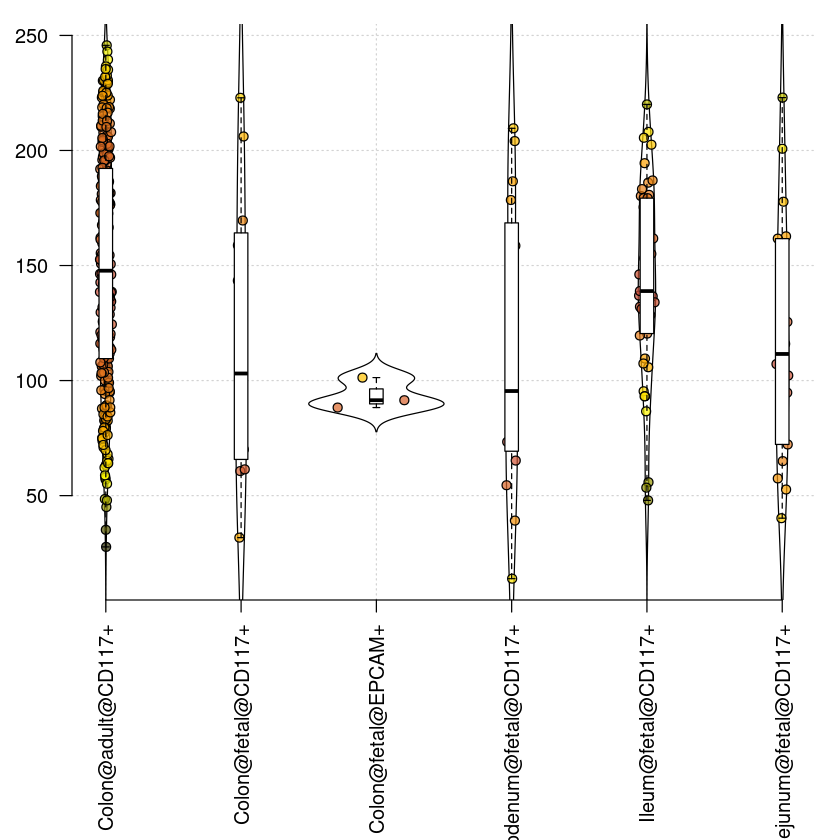

In [55]:
#tuft_genes = read.delim("figures/figure3_5/activation_genes_sc_heatmap.txt", stringsAsFactors = F, row.names=1)

core_genes = rownames(tuft_genes)[ tuft_genes$anno == "Core"]
score = colSums(primary_foc[ core_genes,])
par(mar = c(10,3,1,1))
plot_density_points(score, comb, las = 2, with_box = T)

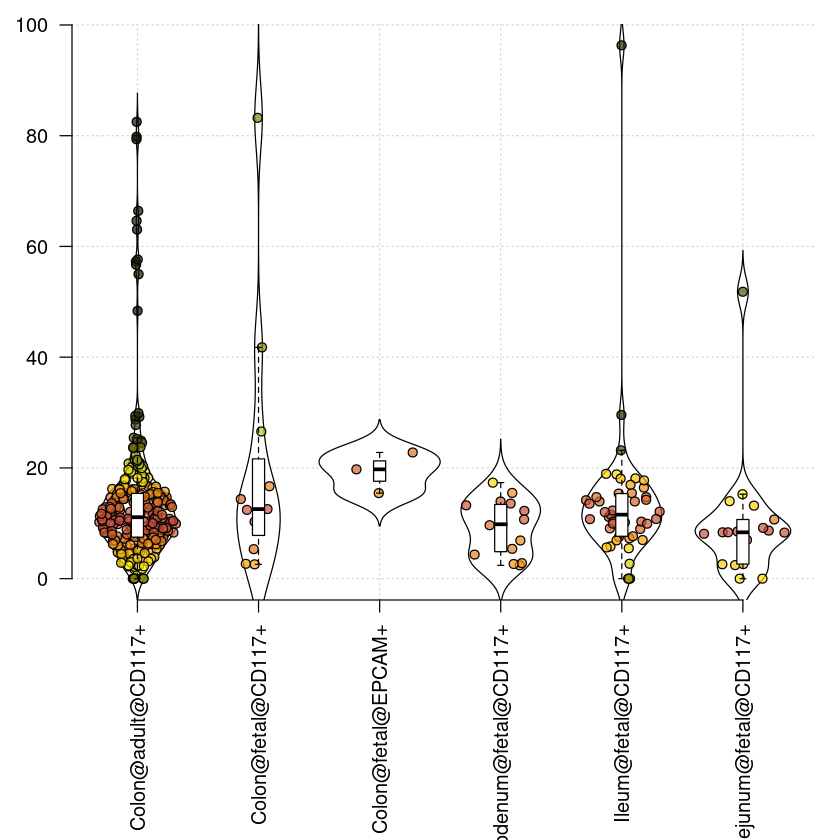

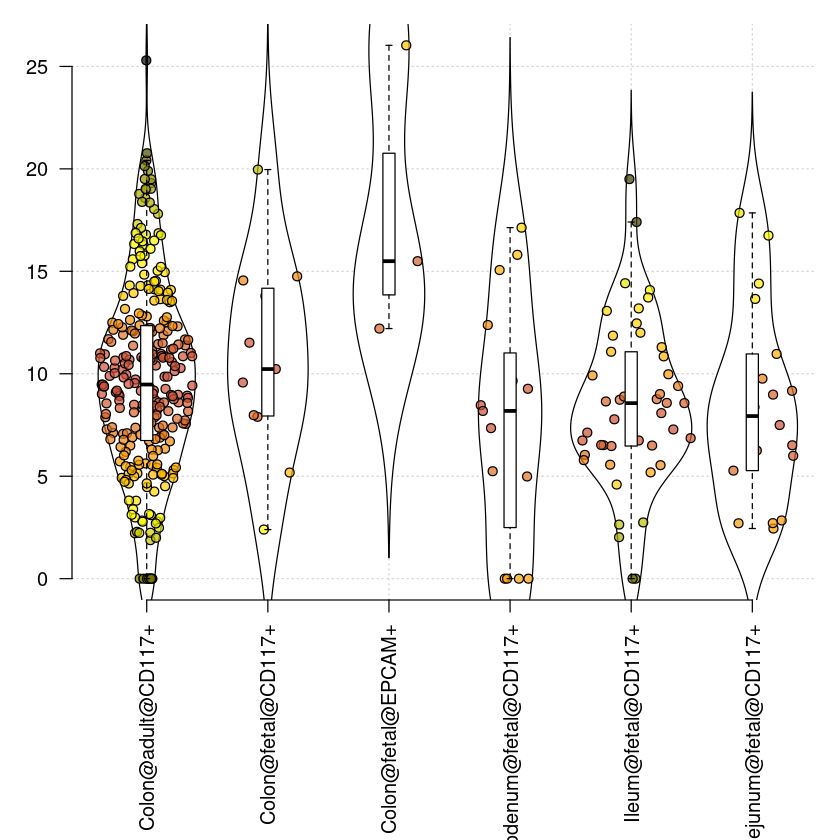

In [56]:
tuft4_genes = rownames(tuft_genes)[ tuft_genes$anno == "Tuft-4"]
score4 = colSums(primary_foc[ tuft4_genes,])

tuft3_genes = rownames(tuft_genes)[ tuft_genes$anno == "Tuft-3"]
score3 = colSums(primary_foc[ tuft3_genes,])

module_genes = rownames(tuft_genes)[ tuft_genes$anno == "Tuft-2"]
score2 = colSums(primary_foc[ module_genes,])

par(mar = c(10,3,1,1))
plot_density_points(score3, comb, las = 2, with_box = T)
plot_density_points(score4, comb, las = 2, with_box = T)

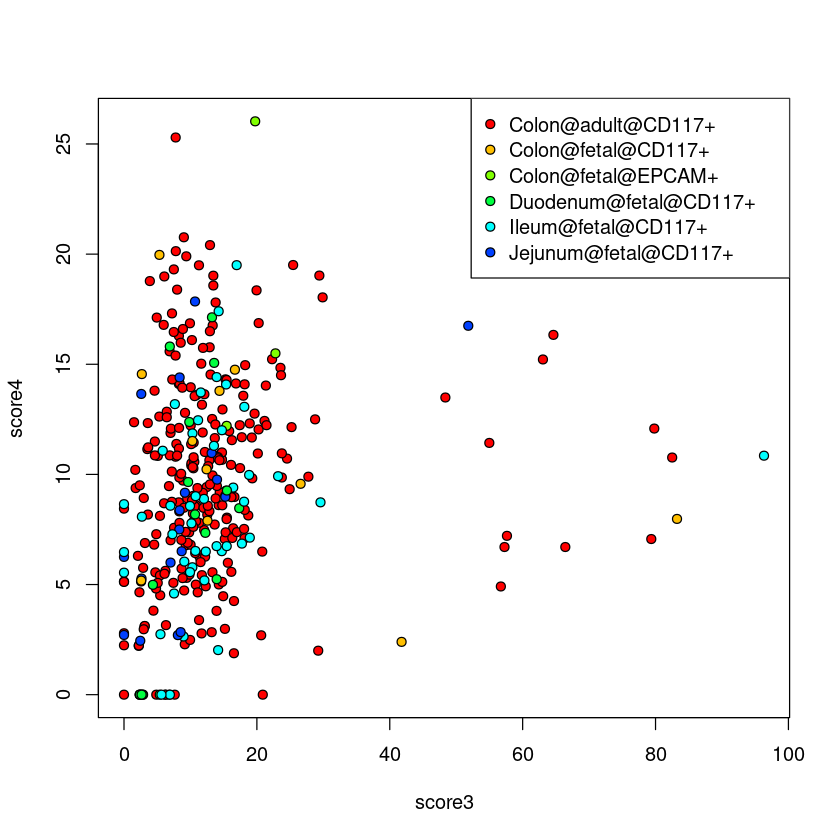

In [57]:
l = names(table(comb))
plot(score3, score4, pch = 21, bg = rainbow(8)[ as.numeric(factor(comb))])
legend("topright", l, pch = 21, pt.bg = rainbow(8))

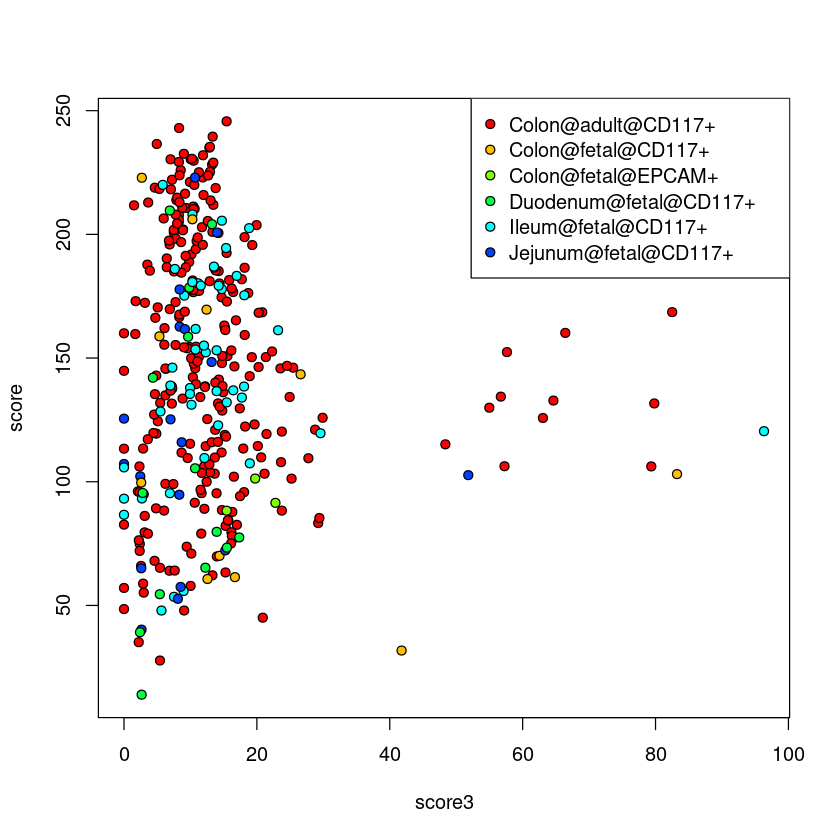

In [58]:
l = names(table(comb))
plot(score3, score, pch = 21, bg = rainbow(8)[ as.numeric(factor(comb))])
legend("topright", l, pch = 21, pt.bg = rainbow(8))

In [59]:
sort(table(comb))
l = c('Colon@adult@CD117+', 'Ileum@adult@CD117+')
good_cells = names(comb)[ comb %in% l]
table(comb[ good_cells])

comb
   Colon@fetal@EPCAM+    Colon@fetal@CD117+ Duodenum@fetal@CD117+ 
                    3                    11                    15 
 Jejunum@fetal@CD117+    Ileum@fetal@CD117+    Colon@adult@CD117+ 
                   18                    45                   271 


Colon@adult@CD117+ 
               271 

In [60]:
cell_anno = ifelse(score3 > 22, "Tuft-3", "None"); names(cell_anno) = names(score3)
table(comb[ good_cells], cell_anno[ good_cells])

                    
                     None Tuft-3
  Colon@adult@CD117+  246     25

In [61]:
#good_cells = names(comb)[ comb %in% l]
comb2 = paste0(comb[ good_cells],"@", cell_anno[good_cells]); names(comb2) = good_cells
table(comb2)
m = t(apply(primary_n[, good_cells], 1, tapply, comb2[ good_cells], mean))


comb2
  Colon@adult@CD117+@None Colon@adult@CD117+@Tuft-3 
                      246                        25 

In [62]:
reg = 0.04
z2tuft = log2((reg + m[,"Ileum@adult@CD117+@Tuft-3"]) / (reg + m[,"Ileum@adult@CD117+@None"]))
#z2ep = log2((reg + m[,"Ileum@adult@CD117+@Tuft-3"]) / (reg + m[,"Ileum@adult@EPCAM+@Tuft-3"]))

#plot(z2ep, z2tuft, type = "n")
#text(z2ep, z2tuft, names(z2ep), col = anno_cols[genes[ names(z2ep), "anno"]], cex = 0.5)

ERROR: Error in m[, "Ileum@adult@CD117+@Tuft-3"]: subscript out of bounds


In [ ]:
diff_genes = scr_chi_square_diff_genes(primary_umis, 
            g1 = names(which(comb2[ good_cells] == "Ileum@adult@CD117+@Tuft-3")), 
            g2 = names(which(comb2[ good_cells] == "Ileum@adult@CD117+@None")), pval = 1e-3, fdr = T)

tuft3_diff = intersect(diff_genes, tuft3_genes)
length(tuft3_diff)
#write.table(names(head(sort(z2tuft[ tuft3_genes], T))), quote = F, row.names = F)

In [ ]:
cc_col = "#a36250"

x = sort(z2tuft[ tuft3_genes])
p = function() {
    barplot(x, horiz = T, 
            col = ifelse(names(x) %in% tuft3_diff, cc_col, "white"), 
            names.arg = rep("", length(tuft3_genes)))    
}

p()
pdf(paste0(outdir, "/FigS4h.pdf"), height=12, width=8)
p()
dev.off()

In [ ]:
cc_genes = setdiff(rownames(tuft_genes)[ tuft_genes$anno == "Tuft-3"], c("MUC2", "ITLN1", "TK1", "PIGR", "H4C3"))
cc_disp_genes = union(names(head(sort(z2tuft[ cc_genes], T), 20)), c("PCNA", "UBE2C"))
sort(cc_disp_genes)

In [ ]:
core_genes = c("AVIL", "POU2F3", "KIT")#, "ALOX5AP", "BMX", "SH2D6")
disp_genes = unique(c(core_genes, cc_disp_genes))
disp_genes

hct = factor(c(rep("Core", length(core_genes)), 
        rep("CC", length(cc_disp_genes))),
        levels = c("Core", "CC")); 
names(hct) = disp_genes

In [ ]:
tissue = factor(paste0(cell_stats[ good_cells, "source"], "-",
                      cell_stats[ good_cells, "age"])); names(tissue) = good_cells

table(tissue)

In [ ]:
IM2 = as.matrix(log(1 + 7 * primary_umis[ disp_genes, good_cells]))

vct = paste0(comb[ colnames(IM2)], "@", cell_anno[ colnames(IM2)]); names(vct) = colnames(IM2)

IM2 = IM2[,order(score3[ colnames(IM2)])]
IM2 = IM2[,order(vct[ colnames(IM2)])]
IM2 = IM2[ order(hct[ rownames(IM2)], rowSums(primary_umis[ rownames(IM2),])),]

In [ ]:
max_row = t(apply(IM2, 1, tapply, comb[ colnames(IM2)], quantile, 0.99))
head(max_row)

IM3 = pmin((0 + IM2) / (0 + max_row[, comb[ colnames(IM2)]]), 1)

In [ ]:

grad = colorRampPalette(c("white", brewer.pal(9, "YlOrBr")))(1000)

p = function() { 
    par(mar = c(0.5,7,0.5,0.5), fig = c(0,0.9,0.1,1))
    image.2(IM3, col = grad, annotate = "rows",
        vct = vct[ colnames(IM2)], hct = hct[ rownames(IM3)])
    box()
    par(mar = c(0.5,0.5,0.5,0.5), fig = c(0.95,1,0.3,0.6), new = T)
#    image(matrix(seq_len(ncol(IM2))), axes = F, col = anno_cols[ as.vector(sort(cell_anno[ colnames(IM2)]))])
#     box()
    image(y = seq(min(IM3), max(IM3), length.out = length(grad)), t(seq_along(grad)), col=grad, axes=F)
    axis(2,las=2); box()
#    par(mar = c(0.5,7,0.5,0.5), fig = c(0,0.9,0.1,0.15), new = T)
    par(mar = c(0.5,7,0.5,0.5), fig = c(0,0.9,0.05,0.1), new = T)
    image(matrix(seq_len(ncol(IM3))), axes = F, ylab = "cell", las = 2,
          col = c("gray80", cc_col)[ as.numeric(factor(cell_anno[ colnames(IM3)]))]); box()

#    image(matrix(seq_len(ncol(IM2))), axes = F, ylab = "gating",
#          col = c(anno_cols["Tuft-1"], "cyan3")[ as.numeric(gating[ colnames(IM2)])]); box()
    par(mar = c(0.5,7,0.5,0.5), fig = c(0,0.9,0,0.05), new = T)
    image(matrix(seq_len(ncol(IM3))), axes = F, ylab = "source",
          col = rainbow(3, alpha = 0.5)[ as.numeric(tissue[ colnames(IM3)])]); box()
}

p()
pdf(paste0(outdir, "/FigS4g.pdf"), height=12, width=8)
p()
dev.off()


In [ ]:
no_cc = names(which(cell_anno != "Tuft-3"))
l = c('Colon@adult@CD117+', 'Ileum@adult@CD117+')#, 'Ileum@fetal@CD117+')
good_cells = intersect(no_cc, names(comb)[ comb %in% l])

ds = .downsamp(primary_umis[,good_cells], 500)
uc = rowSums(primary_umis[,good_cells])
nc = rowSums(primary_umis[, good_cells] > 0)

bad_genes = grep("^RPL|^RPS|^SNOR|^A[CLP][0-9]|^MTCO[0-9]|^MT|^MTRNR|^MTND|^MTC|^MTA|^HLA-|^IG[K,H]", rownames(primary_umis), v=T)
exp_genes = intersect(setdiff(union(names(which(uc > 150 & nc > 50)), rownames(genes)), c(bad_genes, "MALAT1")), 
                      rownames(ds))
core_genes = c("AVIL", "POU2F3", "KIT")
exp_genes = union(exp_genes, core_genes)
length(exp_genes)

cells = intersect(colnames(ds), names(comb)[comb %in% l])
table(comb[cells])
table(comb[no_cc])
#C = cor(log(1 + t(ds[ exp_genes, cells])), modules[cells,])
#dim(C)

In [ ]:

X = log(1 + ds[intersect(exp_genes, union(core_genes, rownames(tuft_genes)[ tuft_genes$anno == "Tuft-4"])),  cells])
C = sapply(l, function(c) {
    cells = intersect(colnames(X), names(which(comb == c)));
    cor(t(X[, cells]), score4[cells], m = "spearman")})
dim(C)
rownames(C) = rownames(X)

In [ ]:
table(comb)

In [ ]:
head(C)
dim(X)
dim(C)
plot(C[,1], C[,2], type = "n"); grid(col = "red")
text(C[,1], C[,2], rownames(C))

diff_genes = setdiff(names(which(apply(C[,1:2],1,max) > 0.13)), c())
sort(diff_genes)

In [ ]:
core_genes = c("AVIL", "POU2F3", "KIT")
disp_genes = unique(c(core_genes, diff_genes))
disp_genes

In [ ]:
IM2 = as.matrix(primary_foc[ disp_genes, good_cells])

hct = factor(c(rep("Core", length(core_genes)), 
        rep("Activation", length(diff_genes))), levels = c("Core", "Activation")); names(hct) = disp_genes
vct = paste0(comb[ colnames(IM2)], "@", cell_anno[ colnames(IM2)]); names(vct) = colnames(IM2)

IM2 = IM2[,order(score4[ colnames(IM2)])]
IM2 = IM2[,order(vct[ colnames(IM2)])]
#IM2 = IM2[ order(hct[ rownames(IM2)], rowSums(primary_umis[ rownames(IM2),])),]
gene_rank = rowSums(primary_umis[ rownames(IM2),]) * (1 - 2 * (C[ rownames(IM2),1] - C[ rownames(IM2),2] > 0))
IM2 = IM2[ order(hct[ rownames(IM2)], gene_rank),]
    
max_row = t(apply(IM2, 1, tapply, vct[ colnames(IM2)], quantile, 0.99))
head(max_row)

IM3 = pmin((0 + IM2) / (0 + max_row[, vct[ colnames(IM2)]]), 1)

In [ ]:

grad = colorRampPalette(c("white", brewer.pal(9, "YlOrBr")))(1000)
p = function() { 
    par(mar = c(0.5,7,0.5,0.5), fig = c(0,0.9,0.05,0.95))
    image.2(IM3, col = grad, annotate = "rows",
        vct = vct[ colnames(IM3)], hct = hct[ rownames(IM3)])
    box()
    par(fig = c(0,0.9,0,0.05), new = T)
    image(matrix(seq_len(ncol(IM3))), axes = F, 
          col = rainbow(3, alpha = 0.5)[ as.numeric(tissue[ colnames(IM3)])], ylab = "tissue")
    box()
    par(fig = c(0,0.9,0.95,1), new = T)
    plot(score4[ colnames(IM3)], type = "h", xaxs = "i", axes = F, ylab = "score"); axis(2, las = 2)
    box()
    par(fig = c(0.95,1,0.3,0.6), new=T, mar = c(0.5,0.5,0.5,0.5))
    image(y = seq(min(IM3), max(IM3), length.out = length(grad)), t(seq_along(grad)), col=grad, axes=F)
    axis(2,las=2); box()
}

p()

pdf(paste0(outdir, "/FigS4j.pdf"), height=8, width=8)
p()
dev.off()
#png(paste0(outdir, "/organoid_tuft_genes_on_both.png"), height=max(2000, nrow(IM2) * 12), width=1500)
#p()
#dev.off()



In [ ]:
c = "Ileum@adult@CD117+"
#genes = c("MGST3", "PHGR1", "VIPR1", "CDHR2", "SYNGR2")
genes = c("MGLL", "VIPR1", "SDCBP2", "KRT20", "PHGR1", "VIPR1-AS1")
#genes = setdiff(names(which(C[,c]> 0.1)), c("AREG")) # colon
genes

In [ ]:
#genes = c("PHGR1", "VIPR1", "CDHR2")
bs = 30
skip = 5
n = length(cells)
ss4 = names(sort(score4[cells]))
eyes = seq(1, n - bs, by = skip)
#m2 = rep(NA, length(eyes))
m = list()
for (gene in genes) {
    m[[gene]] = matrix(NA, nrow = length(eyes), ncol = 3)
    for (j in seq_along(eyes)) {
        i = eyes[j]
        #message(i, "-", i + bs)
        sub_cells = ss4[i:(i + bs)]
    #    m2[j] = mean(ds[ gene, sub_cells])
        m[[gene]][j,] = binconf(sum(ds[gene, sub_cells]), sum(ds[, sub_cells])) * mean(ds[, sub_cells])
    }
    m[[gene]] = m[[gene]] / max(m[[gene]][,1])    
}
m
#plot(m2, m[,1])

In [ ]:
#
cols = rainbow(length(genes), v = 0.8); names(cols) = genes

p = function() {
    par(mfrow = c(2,3), par(mar = c(3,3,3,0.5)))
    for (gene in genes) {
        plot(eyes, eyes, type = "n", axes = F, xlab = "", ylab = "", ylim = c(0,max(m[[gene]], na.rm=T)), main = gene)
        axis(1); axis(2, las = 2)
        coords = cbind(x = c(eyes, rev(eyes)), y = c(m[[gene]][,2], rev(m[[gene]][,3])))
        polygon(coords, col = alpha(cols[gene], 0.1), border = cols[gene])
        lines(eyes, m[[gene]][,1], col = cols[gene], lwd = 3)    
    }

}

p()
pdf(paste0(outdir, "/FigS4k.pdf"), height=4, width = 6)
p()
dev.off()
#plot(score4[ cells], primary_n[gene, cells])

In [ ]:
l = c('Colon@adult@CD117+', 'Ileum@adult@CD117+')

In [ ]:
cells = names(comb)[ comb %in% l]
plot(score4[cells],score3[cells])
cor.test(score4[cells],score3[cells], m = "spearman")
abline(h=17)

In [ ]:
#cc_fac = paste0(comb[ifelse(score3[cells] > 20, "Yes", "No"); names(cc_fac) = cells
cc_fac = factor(comb2[ cells], levels = paste0(rep(l, each = 3), "@", rep(c("None", "Tuft-3", NA), 2)))
names(cc_fac) = cells
table(cc_fac)

In [ ]:

p = function() {
    boxplot(score4[cells] ~ cc_fac[ cells], axes = F, col = c("gray80", cc_col, NA), xlab = "", ylab = "Tuft-4 score")
    axis(2, las = 2); axis(1, at = c(1.5, 4.5), labels = c("Colon", "Ileum"));
}

wilcox.test(score4[ names(cc_fac)[cc_fac == "Ileum@adult@CD117+@None"]], score4[ names(cc_fac)[cc_fac == "Ileum@adult@CD117+@Tuft-3"]])
wilcox.test(score4[ names(cc_fac)[cc_fac == "Colon@adult@CD117+@None"]], score4[ names(cc_fac)[cc_fac == "Colon@adult@CD117+@Tuft-3"]])

p()
pdf(paste0(outdir, "/FigS4l.pdf"), useDingbats = F)
p()
dev.off()

## Core score over primary

In [ ]:
scdb_init("saved_work", force=T)
sc_mat = scdb_mat("intestinal_tufts_tissue")
sc_mat@ncells

In [ ]:
cell_stats = sc_mat@cell_metadata[ sc_mat@cells,]
head(cell_stats)

In [ ]:
table(cell_stats$source, paste0(cell_stats$type, "@", cell_stats$gating))
quantile(cell_stats$umicount)

In [ ]:
colon_cells = rownames(cell_stats)[ cell_stats$gating == "CD117+"]
length(colon_cells)

colon_umis = read_large_umis("intestinal_tufts_tissue", cells = colon_cells)

In [ ]:
X = obj@assays$RNA
data = X[,samp_cells]
data_n = sweep(data,2,colSums(data),"/") * 1000
table(anno[ samp_cells])

In [ ]:
shared = intersect(rownames(colon_umis), rownames(data))
length(shared)

markers = setdiff(intersect(shared, names(scdb_gset("teichman")@gene_set)), c("MALAT1", "B2M"))
length(markers)

In [ ]:
shared_umis = as.matrix(cbind(data[shared,], colon_umis[shared,]))
anno_l = names(table(anno[ colnames(data_n)]))
anno_n = as.numeric(factor(anno[ colnames(data_n)])); names(anno_n) = colnames(data_n)
#clusts = proj_sc_on_clusts(shared_umis, colon_cells, colnames(data), anno_n, markers = markers)

In [ ]:
colon_n = sweep(colon_umis, 2, colSums(colon_umis), "/") * 1000
foc = log(1 + 7 * colon_n)

In [ ]:
core_genes = intersect(rownames(shared_umis), rownames(tuft_genes)[ tuft_genes$anno == "Core"])
length(core_genes)
sort(core_genes)

In [ ]:
cell_anno = factor(ifelse(colnames(shared_umis) %in% colon_cells, cell_stats[ colnames(shared_umis), "source"], anno_l[anno[ colnames(shared_umis)]]),
                   levels = c(anno_l, "Ileum", "Colon"))
names(cell_anno) = colnames(shared_umis)
table(cell_anno)

In [ ]:
shared_n = sweep(shared_umis, 2, colSums(shared_umis), "/") * 1000
foc = log(1 + 7 * shared_n)

In [ ]:
score = colSums(foc[ core_genes,])
boxplot(score ~ cell_anno)

In [ ]:
#venn(names(score), colnames(data))
venn(names(anno), colnames(data))
#length(x)

table(anno[ colnames(data)] != "Tuft")

X = outer(score[colnames(data)], x, ">=")
sum(is.na(X))

Y = anno[ colnames(data)] != "Tuft"
sum(is.na(Y))

head(Y[is.na(Y)])

In [ ]:
x = seq(0, max(score), by = 0.25)

#sub_cells = intersect(names(which(!is.na(anno))), colnames(data))
fp = colSums(outer(score[colnames(data)], x, ">=") * (anno[ colnames(data)] != "Tuft") + 
    outer(score[colnames(data)], x, "<") * (anno[ colnames(data)] == "Tuft"))
plot(x, fp, type = "l")

min(fp, na.rm = T)
thresh = x[ which.min(fp)]
thresh

#fp = (score[colnames(data)] >= x & anno[ colnames(data)] < 7) | 
#    (score[colnames(data)] < x & anno[ colnames(data)] == 7)


In [ ]:
X = table(cell_anno, score > thresh)
Xn = X / rowSums(X)
round(100 * Xn, 1)

barplot(Xn[,2])

In [ ]:
sub_cells = intersect(names(which(!is.na(cell_anno))), colnames(shared_umis))

p = function() {
    par(mar = c(10,3,1,1))
    plot_density_points(log2(score[sub_cells]), cell_anno[sub_cells], with_box = F, las = 2, grid = F, with_points = F, 
                        pol.col = c(rep("gray80", 6), "antiquewhite", rep("tomato2", 2))) #,
                       #inflate=0.6); 
    abline(h=log2(thresh), lwd = 2)
}

p()
pdf(paste0(outdir, "/Fig2h.pdf"), useDingbats = F)
p()
dev.off()

## Fetal

good_pops = c("Stem cells", "TA", "Enterocyte", "Goblet cell", "Paneth", "EEC", "Tuft")
anno = factor(anno, levels = good_pops); names(anno) = rownames(metadata)
table(anno)

In [ ]:
eec_pops = names(table(metadata$annotation))[12:21]
anno = as.vector(metadata$annotation)
names(anno) = rownames(metadata)
anno[ anno %in% eec_pops] = "EEC"
table(metadata$annotation,anno)

In [ ]:
head(metadata)
table(metadata$Age_group, metadata$Diagnosis)

In [ ]:
good_cells = names(anno)[ anno == "Tuft" &
                        metadata$Age_group %in% c("Adult", "First trim", "Second trim", "Pediatric")]
age = as.vector(metadata$Age_group); names(age) = rownames(metadata)
x = table(age[ good_cells])
sort(x)
setdiff(good_pops, names(x))

In [ ]:
good_pops = names(which(x > 30))
anno = factor(age, levels = c("Second trim", "Pediatric", "Adult")); names(anno) = rownames(metadata)
table(anno[ good_cells])

tuft_cells = intersect(good_cells, names(anno)[ anno == "Tuft"])
length(tuft_cells)

sort(table(as.vector(metadata[ tuft_cells, "Sample.name"])))

In [ ]:
k=500
samp_cells = good_cells #unlist(tapply(good_cells, anno[good_cells], function(x) sample(x, min(length(x), k))))
table(anno[ samp_cells])
length(samp_cells)
                           
head(samp_cells)

In [ ]:
X = obj@assays$RNA
data = X[,samp_cells]
data_n = sweep(data,2,colSums(data),"/") * 1000

In [ ]:
table(as.vector(metadata[samp_cells, "Sample.name"]), as.vector(metadata[samp_cells, "Age_group"]))

scdb_add_mat("teichman_all_tuft", scm_new_matrix(X[,samp_cells], cell_metadata = metadata[samp_cells,]) )

In [ ]:
head(metadata)
table(metadata$Diagnosis)
adult_cells = rownames(metadata)[ metadata$Diagnosis == "Healthy adult"]
length(adult_cells)

scdb_add_mat("teichman_all", scm_new_matrix(X[,adult_cells], cell_metadata = metadata[adult_cells,]))

In [ ]:
anno_l = names(table(anno))
anno_l

In [ ]:
scdb_init("saved_work", force=T)

sc_mat = scdb_mat("all_lulu")
sc_mat@ncells

cell_stats = sc_mat@cell_metadata
head(cell_stats)

In [ ]:
table(cell_stats$type, cell_stats$age)

In [ ]:
table(cell_stats$type, cell_stats$age)

fetal_cells = rownames(cell_stats)[ cell_stats$age == "fetal" & cell_stats$type == "tissue" & cell_stats$gating == "CD117+" &
                    cell_stats$umicount > 500 &
                    cell_stats$mt_count / cell_stats$umicount < 0.4]
length(fetal_cells)

In [ ]:
sort(table(cell_stats[ fetal_cells, "amp_batch_id"]))

In [ ]:
fetal_umis = read_large_umis("all_lulu", cells = fetal_cells)

In [ ]:
shared_genes = intersect(rownames(data), rownames(fetal_umis))
shared_umis = cbind(data_n[ shared_genes,], fetal_umis[ shared_genes,])

In [ ]:
anno_l = names(table(anno))
cell_anno = factor(ifelse(colnames(shared_umis) %in% fetal_cells, "KIT", anno_l[anno[ colnames(shared_umis)]]),
                   levels = c(anno_l, "KIT"))

#cell_anno = anno[ colnames(shared_umis)]
names(cell_anno) = colnames(shared_umis)
table(cell_anno)

In [ ]:
table(cell_anno == "KIT")

In [ ]:
shared_n = sweep(shared_umis, 2, colSums(shared_umis), "/") * 1000
foc = log(1 + 7 * shared_n)

In [ ]:
core_genes = intersect(rownames(shared_umis), rownames(tuft_genes)[ tuft_genes$anno == "Core"])
sort(core_genes)

In [ ]:
score = colSums(foc[ core_genes,])
boxplot(score ~ cell_anno)

In [ ]:
head(anno)

In [ ]:
table(anno[ colnames(data)])

In [ ]:
x = seq(0, max(score), by = 0.25)

sub_cells = intersect(colnames(data), names(which(!is.na(anno))))
fp = colSums(outer(score[sub_cells], x, ">=") * (anno[ sub_cells] != "Tuft") + 
    outer(score[sub_cells], x, "<") * (anno[ sub_cells] == "Tuft"))
plot(x, fp, type = "l")

min(fp)
thresh = x[ which.min(fp)]
thresh

#fp = (score[colnames(data)] >= x & anno[ colnames(data)] < 7) | 
#    (score[colnames(data)] < x & anno[ colnames(data)] == 7)


In [ ]:
X = table(cell_anno, score > thresh)
Xn = X / rowSums(X)
round(100 * Xn, 1)

barplot(Xn[,2])

In [ ]:
p = function() {
    par(mar = c(10,3,1,1))
    plot_density_points(log2(score), cell_anno, with_box = F, las = 2, grid = F, with_points = F, 
        pol.col = c(rep("antiquewhite", 3), "tomato2")) #,

}

p()
pdf(paste0(outdir, "/FigS9b.pdf"), useDingbats = F)
p()
dev.off()

In [ ]:
table(cell_anno)

In [ ]:


genes = c("ALOX5AP", "BMX", "AVIL", "IL13RA1", "KIT", "POU2F3")
m = t(apply(shared_n[genes, ], 1, tapply, cell_anno, mean))
IM = log2(m[, rev(colnames(m))] + 0.02)
exp_freq = t(apply(shared_umis[genes, ] > 0, 1, tapply, cell_anno, mean)) * 100
exp_freq = exp_freq[ ,colnames(IM)]

grad = colorRampPalette(c("white", brewer.pal(9, "YlOrBr")))(101)

p = function() {
    par(mar = c(3,10,1,3))
    matplot.2(t(IM), t(exp_freq), grad=grad, cex_lim = seq(0,100, by = 25))
}

p()
pdf(paste0(outdir, "/FigS9c.pdf"), height=10, width=15, useDingbats = F)
p()
dev.off()

genes = union(read.table("annotations//stem_genes.txt", stringsAsFactors = F)[[1]],
              c("MEX3A", "ANXA1", "TACSTD2", "PROX1"))

m = t(apply(shared_n[genes, ], 1, tapply, cell_anno, mean))
IM = log2(m + 0.02)
exp_freq = t(apply(shared_umis[genes, ] > 0, 1, tapply, cell_anno, mean)) * 100
exp_freq = exp_freq[ ,colnames(m)]

p()
pdf(paste0(outdir, "/FigS9d.pdf"), height=10, width=15, useDingbats = F)
p()
dev.off()
